In [1]:
# PART 1

# downloading packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from adjustText import adjust_text

In [2]:
# downloading clean dataset
# importing the dataset (Justine)
clean_smoking = pd.read_csv("C:/Users/justi/Introduction-to-Python-S1-M1/Python-Introduction-Smoking-Prevalence/data/clean/clean_smoking_df.csv")
clean_educ =pd.read_csv("C:/Users/justi/Introduction-to-Python-S1-M1/Python-Introduction-Smoking-Prevalence/data/clean/clean_educ_df.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/justi/Introduction-to-Python-S1-M1/Python-Introduction-Smoking-Prevalence/data/clean/clean_smoking_df.csv'

In [3]:
# importing the dataset (Nils)
clean_smoking = pd.read_csv("C:/Users/nilsr/Desktop/Uni/Masters/z.Python/Python-Introduction-Smoking-Prevalence/data/clean/clean_smoking_df.csv")
clean_educ =pd.read_csv("C:/Users/nilsr/Desktop/Uni/Masters/z.Python/Python-Introduction-Smoking-Prevalence/data/clean/clean_educ_df.csv")


In [4]:
# PART 2:regression of smoking prevalence on sex

# preparing data
clean_smoking.head()
clean_smoking.isnull().sum()
clean_smoking.head()

,Unnamed: 0,structure_name,age,sex,unit_of_measure,geo,time_period,obs_value
0,0,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Austria,2023,25
1,1,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Belgium,2023,15
2,2,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Bulgaria,2023,27
3,3,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Cyprus,2023,24
4,4,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Czechia,2023,21


In [5]:
# subset sex variable
clean_smoking['sex_binary'] = clean_smoking['sex'].map({'Females': 0,
                                                        'Males': 1}) # create sex binary var, mapping fem=0 and male=1
clean_smoking['sex_binary'] = pd.to_numeric(clean_smoking['sex_binary'],errors='coerce')
clean_smoking.head()


,Unnamed: 0,structure_name,age,sex,unit_of_measure,geo,time_period,obs_value,sex_binary
0,0,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Austria,2023,25,0
1,1,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Belgium,2023,15,0
2,2,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Bulgaria,2023,27,0
3,3,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Cyprus,2023,24,0
4,4,Smoking prevalence by sex,15 years or over,Females,Percentage of total population,Czechia,2023,21,0


In [6]:
# Filter out the Europe (EU27) aggregate observation for male and female
clean_smoking = clean_smoking[clean_smoking["geo"] != "European Union - 27 countries (from 2020)"]

In [7]:
# set the variables for the regression
X = clean_smoking[['sex_binary']]  # independent variable
y = clean_smoking['obs_value']   # dependent variable
print(X)


    sex_binary
0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           1
29           1
30           1
31           1
32           1
33           1
34           1
35           1
36           1
37           1
39           1
40           1
41           1
42           1
43           1
44           1
45           1
46           1
47           1
48           1
49           1
50           1
51           1
52           1
53           1
54           1
55           1


In [8]:
# Add constant for intercept
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit(
    cov_type="cluster",
    cov_kwds={"groups": clean_smoking["geo"]}) # Cluster SEs on country level, as there are two gender obs. in the same country

# Print full summary
print(model.summary2())

# Save as text
table = model.summary2()

with open("C:/Users/nilsr/Desktop/Uni/Masters/z.Python/Python-Introduction-Smoking-Prevalence/output/regression_results_Q1.txt", "w") as f:
    f.write(table.as_text())


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.236   
Dependent Variable: obs_value        AIC:                386.2264
Date:               2025-12-20 18:24 BIC:                390.2043
No. Observations:   54               Log-Likelihood:     -191.11 
Df Model:           1                F-statistic:        43.38   
Df Residuals:       52               Prob (F-statistic): 5.52e-07
R-squared:          0.250            Scale:              72.105  
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         19.9630    1.1538  17.3014  0.0000  17.7015  22.2244
sex_binary     9.6296    1.4621   6.5863  0.0000   6.7640  12.4952
-----------------------------------------------------------------
Omnibus:               0.165        Durbin-Watson:          2.309
Prob(Omnibus):        

In [9]:
#PART 3: the scatter plot

# preparing the dataset
filtered_clean_smoking=clean_smoking[clean_smoking["time_period"]==2023]
plot = (
    filtered_clean_smoking
    .groupby(["geo","sex_binary"])["obs_value"]
    .mean()
    .reset_index()) # group for country averages for male and female
plot= plot.pivot(index="geo", columns="sex_binary", values="obs_value") # reshape to wide
name_country = len(plot)


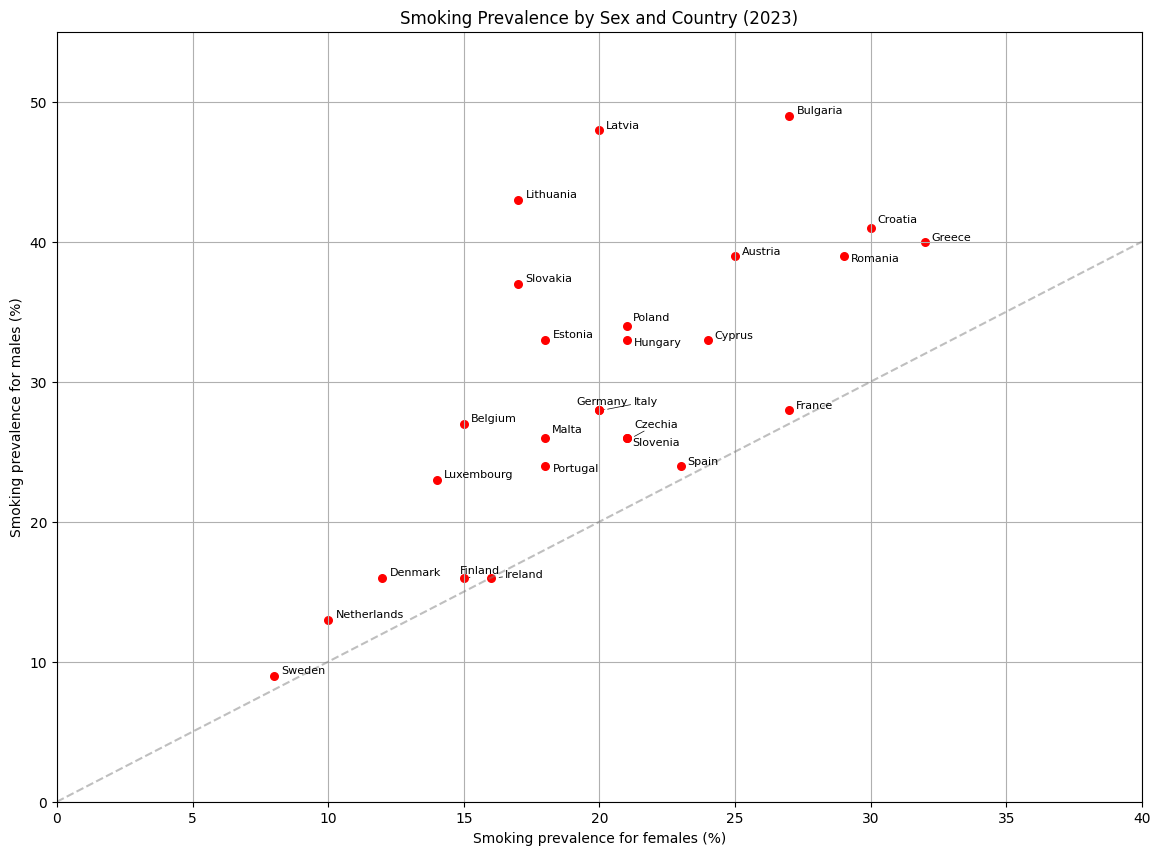

In [11]:
# doing the graph
labels = []
plt.figure(figsize=(14, 10)) # plot size

for i, geo in enumerate(plot.index): # loop over all datapoints
    plt.scatter(plot.loc[geo, 0], plot.loc[geo, 1],
                color="red", s=30) # scatter point
    labels.append(plt.text(plot.loc[geo, 0]+0.2, plot.loc[geo, 1], geo, fontsize=8)) # add country label to point
plt.xlabel("Smoking prevalence for females (%)")
plt.ylabel("Smoking prevalence for males (%)")
plt.title("Smoking Prevalence by Sex and Country (2023)")
plt.grid(True)
plt.xlim(0, 40)
plt.ylim(0, 55)
plt.plot([0, 50], [0, 50], linestyle='--', color="gray", alpha = 0.5)
adjust_text(
    labels,
    force_text=0.5,
    arrowprops=dict(arrowstyle='-', linewidth=0.5))

# Exporting (Nils)
plt.savefig("C:/Users/nilsr/Desktop/Uni/Masters/z.Python/Python-Introduction-Smoking-Prevalence/output/q1_scatter.png", bbox_inches="tight")